# 트랜스포머(Transformer)
- Soruce : https://wikidocs.net/31379
- 트랜스포머는 2017년 구글이 발표한 논문인 'Attention is all you need'에서 나온 모델로 기존의 seq2seq의 구조인 인코더-디코더를 따르면서도, 논문의 이름처럼 어텐션Attention만으로 구현한 모델이다. 이 모델은 RNN을 사용하지 않고, 인코더-디코더 구조를 설계하였음에도 성능도 RNN보다 우수하다는 특징을 가지고있다.
- Paper Source : https://arxiv.org/abs/1706.03762 (Attetnion Is All You Need, 	arXiv:1706.03762 )

## 기존의 seq2seq 모델의 한계
- 기존의 seq2seq 모델은 인-디코더 구조로 구성되어있다. 여기서 인코더는 입력시퀀스를 하나의 벡터표현으로 압축하고, 디코더는 이 벡터표현을 통해서 출력시퀀스를 만들어냈다.
- 하지만, 이런 구조는 인코더가 입력시퀀스를 하나의 벡터로 압축하는 과정에서 입력시퀀스의 정보가 일부 손실된다는 단점이 있었고, 이를 보정하기 위해 어텐션이 사용되었다. 그런데 어텐션을 RNN의 보정을 위한 용도가 아니라 아예 어텐션으로 인코더와 디코더를 만들어보면 어떨까?

## 트랜스포머의 주요 하이퍼파라미터
- $d_{model} = 512 $
    - 트랜스포머와 인코더와 디코더에서의 정해진 입력과 출력의 크기를 의미한다.
    - 임베딩벡터의 차원 또한 dmodel 이며, 각 인코더와 디코더가 다음 층의 인코더와 디코더로 값을 보낼때에도 이 차원을 유지한다. 논문에서는 512값으로 지정해줬다.
- num_layers = 6
    - 하나의 인코더와 디코더를 층으로 생각했을때, 트랜스포머모델에서 인코더와 디코더가 총 몇 층으로 구성되었는지를 의미한다.
    - 논문에서는 인-디코더를 각각 총 6개씩 쌓았다.
- num_heads = 8
    - 트랜스포머에서는 어텐션을 사용할때, 1번 하는 것보다 여러개로 분할해서 병렬로 어텐션을 수행하고 결과값을 다시 하나로 합치는 방식을 택했다. 이때 이 병렬의 개수를 의미한다.
- <div style="text-align: left">  $d_{ff} = 2048$ </div>
    - 트랜스포머 내부에는 피드포워드신경망(Feed Forward Neural Network)이 존재하며 해당 신경망의 은닉층의 크기를 의미한다.
    - 피드포워드신경망의 입력층과 출력층의 크기는 $d_{model}$이다.

## 트랜스포머Transformer
<img src = "https://wikidocs.net/images/page/31379/transformer1.PNG"><br></br>
- 트랜스포머는 RNN을 사용하지 않지만 기존의 seq2seq처럼 인코더에서 입력시퀀스를 입력받고, 디코더에서 출력시퀀스를 출력하는 인-디코더 구조를 유지하고있다.
- 다만 다른점은 인코더와 디코더라는 단위가 N개가 존재할 수 있다는 점이다.<br>
- seq2seq 구조에서는 인코더와 디코더에서 각각 하나의 RNN이 t개의 시점(time-step)을 가지는 구조였다면 이번에는 인코더와 디코더라는 단위가 N개로 구성되는 구조이다.

<img src = 'https://wikidocs.net/images/page/31379/transformer2.PNG'>
<br><br>
</br>

<img src = 'https://wikidocs.net/images/page/31379/transformer4_final_final_final.PNG'>
<br>
</br>
- 위 그림은 인코더로부터 정보를 전달받아 디코더가 출력결과를 만들어내는 트랜스포머 구조를 보여준다. 디코더는 마치 기존의 seq2seq 구조처럼 시작 심볼  "SOS"를 입력으로 받아 종료 심볼 "EOS"가 나올때까지 연산을 진행한다. 이는 RNN은 사용되지 않지만 여전히 인코더-디코더의 구조는 유지되고 있음을 보여준다.
<br>
- 트랜스포머의 인코더와 디코더는 단순히 각 단어의 임베딩벡터들을 입력받는 것이 아니라 임베딩벡터에서 조정된 값을 입력받는데 이에 대해서 알아보기 위해 입력을 부분을 확대해보자.

## 포지셔널 인코딩 Positional Encoding
- 트랜스포머의 내부를 이해하기전에 **트랜스포머의 입력**에 대해 알아보자.
- RNN이 자연어처리에서 유용했던 이유는 단어위 위치에 따라 단어를 순차적으로 입력받아서 처리하는 RNN의 특성으로 인해 각 단어의 위치정보position information을 가질 수 있다는 점에 있었다.
- 하지만, 트랜스포머는 단어 입력을 순차적으로 받는 방식이 아니므로 단어의 위치정보를 다른 방식으로 알려줄 필요가 있다.
- 트랜스포머는 단어의 위치정보를 얻기 위해서 각 단어의 임베딩벡터에 위치정보들을 더하여 모델의 입력으로 사용하는데, 이를 ***포지셔널 인코딩Positional Encoding***이라고 한다.

![pe](https://wikidocs.net/images/page/31379/transformer5_final_final.PNG)
- 위의 그림은 입력으로 사용되는 임베딩 벡터들이 트랜스포머의 입력으로 사용되기 전에 포시셔널 인코딩값이 더해지는것을 보여준다.
- 임베딩벡터가 인코더의 입력으로 사용되기 전에, 포지셔널 인코딩값이 더해지는 과정을 시각화하면 아래와 같다.
![viz](https://wikidocs.net/images/page/31379/transformer6_final.PNG)

- 트랜스포머의 위치정보를 가진 값을 만들기 위해서는 아래의 두개의 함수를 사용한다.
$$ PE_{(pos,\ 2i)}=sin(pos/10000^{2i/d_{model}}) $$
$$ PE_{(pos,\ 2i+1)}=cos(pos/10000^{2i/d_{model}}) $$
    - 사인함수와 코사인 함수의 값을 임베딩벡터에 더해줌으로써 단어의 순서정보를 더하여 준다.
- 그런데 위의 두 함수에는 $pos, i, d_{model} $ 등의 생소한 변수들이 있는데, 이를 이해하기 위해선 위에서 본 임베딩벡터와 포지셔널인코딩의 덧셈은 사실 임베딩벡터가 모여 만들어진 문장벡터행렬과 포지셔널인코딩행렬의 덧셈연산을 통해 이루어진다는 점을 이해해야한다.

![ㅇㅇ](https://wikidocs.net/images/page/31379/transformer7.PNG)
- $pos$는 입력문장에서의 임베딩벡터의 위치를 나타낸다.
- $i$는 임베딩벡터내의 차원의 인덱스를 의미한다. 
- 위 식에 따르면 임베딩벡터 내의 각 차원의 인덱스가 짝수인 경우에는 사인함수의 값을 사용하고 홀수인 경우에는 코사인함수의 값을 사용한다.
    - 위 수식에서 $(pos, 2i)$일 때는 사인함수를 사용하고, $(pos, 2i+1)$일 때는 코사인함수를 사용하고있다.
- $d_{model}$은 트랜스포머의 모든 층의 출력차원을 의미하는 트랜스포머의 하이퍼파라미터이다. 이는 앞으로 매우 자주 등장할 예정.
- 임베딩벡터 또한 $d_{model}$의 차원을 가지는데 위의 그림에서는 마치 4로 표현되어있찌만 실제 논문에서는 512의 값을 가진다.

- 위와 같은 포지셔널인코딩 방법을 사용하면 순서정보가 보존되는데, 예를들어 각 임베딩벡터에 포지셔널 인코딩값을 더하면 같은 단어라고 하더라도 문장내의 위치에 따라서 트랜스포머의 입력으로 들어가는 임베딩벡터의 값이 달라진다. 결국, 트랜스포머의 입력은 순서정보가 고려된 임베딩벡터이다. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)
        
    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles
    
    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
        position = tf.range(position, dtype = tf.float32)[:, tf.newaxis],
        i = tf.range(d_model, dtype = tf.float32)[tf.newaxis, :],
        d_model = d_model)
        
        # 배열의 짝수 인덱스(2i)에는 사인함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
        
        # 배열의 홀수 인덱스(2i+1)에는 코사인함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])
        
        angle_rads = np.zeros(angle_rads.shape)
        angle_rads[:, 0::2] = sines
        angle_rads[:, 1::2] = cosines
        pos_encoding = tf.constant(angle_rads)
        pos_encoding = pos_encoding[tf.newaxis, ...]

        print(pos_encoding.shape)
        return tf.cast(pos_encoding, tf.float32)
    
    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

- 50 x 128의 크기를 가지는 포지셔널 인코딩행렬을 시각화하여 어떤 형태를 가지는지 확인해보자. 
- 이는 입력문장의 단어가 50개이면서, 각 단어가 128차원의 임베딩벡터를 가질 때 사용 할 수 있는 행렬이다.

(1, 50, 128)


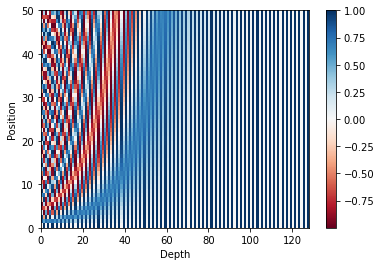

In [3]:
# 문장의 길이 50, 임베딩 벡터의 차원 128
sample_pos_encoding = PositionalEncoding(50, 128)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 128))
plt.ylabel('Position')
plt.colorbar()
plt.show()

## 어텐션Attention
- 트랜스포머에 사용되는 Attention에  대해 3가지로 간단히 정리해보자.

![ㅇㅇㅇ](https://wikidocs.net/images/page/31379/attention.PNG)

- 첫번째 그림인 셀프 어텐션은 인코더에서 이루어지지만, 두번째 그림인 셀프 어텐션과 세번째 그림인 인코더-디코더 어텐션은 디코더에서 이루어진다. 
- 셀프어텐션은 본질적으로 Query, Key, Value가 동일한 경우를 말한다.
- 반면, 세번째 그림인 인코더-디코더 어텐션에서는 Query가 디코더의 벡터인 반면에 Key와 Value가 인코더의 벡터이므로 셀프어텐션이라고 부르지 않는다.
    - 여기서 주의할 점은 Query, Key 등이 같다는 것은 벡터의 값이 같다는 것이 아니라 벡터의출처가 같다는 의미이다.
- 정리
> 인코더의 셀프 어텐션 : Query = Key = Value \
> 디코더의 마스크드 셀프 어텐션 : Query = Key = Value \
> 디코더의 인코더-디코더 어텐션 : Query : 디코어 벡터 / Key = Value : 인코더 벡터

![ㄴㄴㄴ](https://wikidocs.net/images/page/31379/transformer_attention_overview.PNG)

- 위 그림은 트랜스포머의 아키텍쳐에서 3가지 어텐션이 각각 어디에서 이루어지는지를 보여준다.
- 3개의 어텐션에 추가적으로 '멀티헤드'라는 이름이 붙어있다. 이는, 트랜스포머가 어텐션을 병렬적으로 수행하는 방법을 의미한다.

## 인코더Encoder
- 구조
![인코더구조](https://wikidocs.net/images/page/31379/transformer9_final_ver.PNG)

- 트랜스포머는 하이퍼파라미터인 `num_layers` 개수의 인코더 층을 쌓는다.
- 논문에선 총 6개의 인코더층을 사용하였다. 
- 인코더를 하나의 층이라는 개념으로 생각한다면, 하나의 인코더층을 크게 총 2개의 서브층sublayer으로 나뉜다.
- 바로 **셀프 어텐션** 과 **피드포워드신경망**이다. 
- 위 그림에서는 멀티 헤드 셀프 어텐션과 포지션 와이즈 피드 포워드 신경망이라고 적혀있지만, 멀티 헤드 셀프 어텐션은 셀프 어텐션을 병렬적으로 사용하였다는 의미고, 포지션 와이드 피드 포워드 신경망은 일반적인 피드포워드신경망이다.

## 인코더의 셀프 어텐션
- 트랜스포머에서는 셀프어텐션이라는 어텐션기법이 등장하는데 앞서 배웠던 어텐션함수에 대해 복습하고, 셀프어텐션이 앞서 배웠던 어텐셔과 무엇이 다른지 이해해보자


### 셀프 어텐션의 의미와 이점
- 어텐션 함수는 주어진 쿼리Query에 대해서 모든 키Key와의 유사도를 각각 구한다. 그리고 구해낸 이 유사도를 가중치로 하여 키와 맵핑되어있는 각각의 값Value에 반영해준다. 그리고 유사도가 반영된 값Value을 모두 가중합하여 리턴한다.
![ㅇㅇ](https://wikidocs.net/images/page/22893/%EC%BF%BC%EB%A6%AC.PNG)

- 셀프 어텐션self-attention
    - 그냥 어텐션을 자기 자신에게 수행한다는 의미
    - seq2seq에서 어텐션을 사용할 경우의 Q, K, V의 정의를 다시 보자
        - Q = Query : t시점의 디코더 셀에서의 은닉상태
        - K = Keys : 모든 시점의 인코더 셀의 은닉 상태들
        - V = Values : 모든 시점의 인코더 셀의 은닉 상태들
    - 그런데 t 시점이라는 것은 계속 변화하면서 반복적으로 쿼리를 수행하므로 결국 전체시점에 대해서 일반화를 할 수도 있다.
        - Q = Query : 모든 시점의 디코더 셀에서의 은닉상태
        - K = Keys : 모든 시점의 인코더 셀의 은닉 상태들
        - V = Values : 모든 시점의 인코더 셀의 은닉 상태들
    - 이처럼 기존에는 디코더셀의 은닉상태가 Q이고 인코더셀의 은닉상태가 K라는 점에서 Q와 K가 서로 다른 값을 가지고 있었다.
    - 그런데, Self-Attention에서는 Q K V 값이 전부 동일하다. 트랜스포머의 셀프어텐션에서의 Q, K, V는 아래와 같다
        - Q = 입력 문장의 모든 단어 벡터들
        - K = 입력 문장의 모든 단어 벡터들
        - V = 입력 문장의 모든 단어 벡터들
    - 효과
        ![효과](https://wikidocs.net/images/page/31379/transformer10.png)
        - 해석하자면 " 그 동물은 길을 건너지 않았다. 왜냐하면 그것은 너무 피곤하였기 때문이다. " 라는 의미가 된다.
        - 그런데 그것(it)에 해당하는 것은 길(street)일까?? >> 우리는 피곤한 주체가 동물이라는 것을 아주 쉽게 알지만 기계는 그렇지 않다. 하지만, self-attention은 입력문장내의 단어들끼리 유사도를 구함으로써 그것(it)이 동물(animal)과 연관되었을 확률이 높다는 것을 찾아낼 수 있다.
        
- Transformer에서의 Self-Attention의 동작 메커니즘을 알아보자.

### Q, K, V 벡터 얻기
- 사실, 셀프어텐션은 인코더의 초기입력인 $d_{model}$의 차원을 가지는 단어벡터들을 사용해 셀프어텐션을 수행하는것이 아니라 우선 각 단어 벡터들로부터 Q벡터, K벡터, V벡터를 얻는 작업을 거친다.
- 이때, Q, K, V벡터들은 초긱 입력인 $d_{model}$의 차원을 가지는 단어벡터들보다 더 작은 차원을 가지는데, 논문에서는 512차원을 가졌던 각 단어 벡터들을 64의 차원을 가지는 Q, K, V벡터로 변환하였다.
- 64라는 값은 트랜스포머의 `num_heads`로 인해 결정되는데, 트랜스포머는 $d_{model}$을 `num_heads`로 나눈 값을 각 Q, K, V벡터의 차원으로 결정한다.  ( 논문에서는 num_heads를 8로 설정 )
- 다음은 student라는 단어 벡터들 Q, K, V의 벡터로 변환하는 과정이다
![qkv](https://wikidocs.net/images/page/31379/transformer11.PNG)

- 기존의 벡터로부터 더 작은 벡터는 가중치 행렬을 곱함으로써 완성된다.
- 각 가중치 행렬은 $d_{model} × (d_{model}\text{/num_heads})$의 크기를 가진다. 이 가중치 행렬은 훈련과정에서 학습된다.
- 즉, 논문과 같이 $d_{model}$ = 512이고, `num_heads = 8`라면, 각 벡터에 3개의 서로 다른 가중치 행렬을 곱하고 64의 크기를 가지는 Q, K, V벡터를 얻어낸다.
- 위 그림은 단어 벡터중 student벡터로부터 Q, K, V벡터를 얻어내는 모습이고, 모든 단어벡터에 위와 같은 과정을 거치면 I, am, a, student는 각각의 Q, K, V 벡터를 얻는다.

### 스케일드 닷-프로덕트 어텐션 Scaled dot-product Attention
- Q, K, V벡터를 얻은 후, 지금부터는 기존의 어텐션 메커니즘과 동일하다. 각 Q벡터는 모든 K벡터에 대해서 스코어를 구한 후, 분포를 구한 뒤에 이를 사용하여 모든 V벡터를 가중합하여 어텐션 값 또는 컨텍스트 벡터를 구하게 된다. 그리고 이를 모든 Q벡터에 대해서 반복한다.

- 어텐션 함수의 종류는 다양함
- 어텐션을 닷-프로덕트 어텐션에서 값을 스케일링하는 것을 추가하였다고 하여 **스케일드 닷-프로덕트 어텐션Scaled dot-product Attention**이라고 한다.
![sdpa](https://wikidocs.net/images/page/31379/transformer13.PNG)

- 단어 "I"에 대한 Q벡터가 모든 K벡터에 대해 스코어를 구하는 것을 보여준다. (위의 128과 32는 임의로 가정한 수치임)
- 스코어는 각각 단어 'I'가 단어 'I', 'am', 'a', 'student'와 얼마나 연관되어 있는지를 보여주는 수치다.
- 트랜스포머에서는 두 벡터의 내적값을 스케일링하는 값으로 K벡터의 차원을 나타내는 $d_{k}$에 루트를 씌운 $\sqrt{d_{k}}$ 사용하는 것을 택했다.

![sdpa1](https://wikidocs.net/images/page/31379/transformer14_final.PNG)

- 이제 스코어에 소프트맥스함수를 사용해 어텐션 분포Attention Distribution을 구하고, 각 V벡터와 가중합하여 어텐션값Attention Value을 구한다.
- 단어 'I'에 대한 어텐션값 또는 단어 'I'에 대한 컨텍스트 벡터context vector라고도 부른다.
- 'am'에 대한 Q벡터, 'a'에 대한 Q벡터, 'student'에 대한 Q벡터에 대해서도 모두 동일한 과정을 반복해 각각에 대한 어텐션값을 구한다.

> **그런데, 굳이 이렇게 각 Q벡터마다 일일히 따로 연산할 필요가 있을까??**

### 행렬 연산으로 일괄 처리하기
- 사실 각 단어에 대한 Q, K, V 벡터를 구하고 스케일드 닷-프로덕트 어텐션을 수행하였던 위의 과정들은 벡터 연산이 아니라 행렬 연산을 사용하면 일괄 계산이 가능하다.
- 벡터가 아닌 행렬연산으로 이해해보자 >> 각 단어벡터마다 일일히 가중치행렬을 곱하는것이 아니라 문장행렬에 가중치행렬을 곱하여 Q행렬, K행렬, V행렬을 구한다.
![dd](https://wikidocs.net/images/page/31379/transformer12.PNG)
- Q 행렬을 K 행렬을 전치한 행렬과 곱 >> 각각의 단어의 Q벡터와 K벡터의 내적이 각 행렬의 원소가 되는 행렬이 결과로 나온다.
![ㅇㄴ](https://wikidocs.net/images/page/31379/transformer15.PNG)

- 다시말해, 위 그림의 결과 행렬의 값에 전체적으로 $\sqrt{d_{k}}$ 를 나누어주면 이는 각 행과 열이 어텐션스코어값을 가지는 행렬이된다.
- 어텐션스코어행렬을 구하기 -> 어텐션분포 -> 이를 사용해 모든 단어에 대한 어텐션 값을 구하기
- 이는 간단하게 어텐션스코어행렬에 소프트맥스 함수를 사용하고, V행렬을 곱하는것으로 간단화 가능

![ㅇㄴㄴ](https://wikidocs.net/images/page/31379/transformer16.PNG)

> $Attention(Q, K, V) = softmax({QK^T\over{\sqrt{d_k}}})V$

### 스케일드 닷-프로덕트 어텐션 구하기

In [4]:
def scaled_dot_product_attention(query, key, value, mask):
    
    # Q와 K의 곱 = 어텐션 스코어 행렬
    matmul_qk = tf.matmul(query, key, transpose_b = True)
    
    # 스케일링 >> dk의 루트값으로 나눠주기
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)
    
    # 마스킹 : 어텐션 스코어행렬의 마스킹 할 위치에 매우 작은 음수값을 넣어준다.
    # 매우 작은 값이므로, 소프트맥스함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
    if mask is not None:
        logits += (mask * -1e9)
        
    # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
    # attention_weight = (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
    attention_weights = tf.nn.softmax(logits, axis = -1)
    
    # output = (batch_size, num_heads, query의 문장길이, d_model / num_heads)
    output = tf.matmul(attention_weights, value)
    
    return output, attention_weights

- 전치한 Q행렬, K행렬을 곱 -> 소프트맥스함수 사용해 '어텐션분포행렬' -> V 행렬과 곱

In [5]:
# 임의의 Qeury, Key, Value인 Q, K, V 행렬 생성
np.set_printoptions(suppress = True)

# (4, 3)
temp_k = tf.constant([[10, 0, 0],
                     [0, 10, 0],
                    [0, 0, 10],
                      [0, 0, 10]], dtype = tf.float32)

# (4, 2)
temp_v = tf.constant([[1, 0],
                     [10, 0],
                     [100, 5],
                     [1000, 6]], dtype = tf.float32)

# (1, 3)
temp_q = tf.constant([[0, 10, 0]], dtype = tf.float32)

- temp_q (Query)의 값 [0, 10, 0] = temp_k (Key)의 두번째 값 [0, 10, 0]

In [6]:
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn)
print(temp_out)

tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


### 멀티헤드어텐션Multi-head Attention

![dd](https://wikidocs.net/images/page/31379/transformer17.PNG)

- 트랜스포머연구진은 한 번의 어텐션을 하는 것보다 여러번의 어텐션을 병렬로 사용하는 것이 더 효과적이라고 판단
- 그래서 $d_{model}$의 차원을 `num_heads`개로 나누어 $d_{model} / $ num_heads의 차원을 가지는 Q, K, V에 대해 `num_heads`개의 병렬 어텐션을 수행
    - 논문에선 `num_heads`의 값을 8로 지정, 8개의 **병렬 어텐션**이 이루어진다.
    - 다시말해, 어텐션이 8개로 병렬로 이루어지게되는데, 이때 각각의 어텐션 값 행렬을 ***어텐션 헤드*** 라고 부른다.
    - 이때 가중치 행렬 $W^{Q}$, $W^{K}$, $W^{V}$의 값은 8개의 어텐션헤드마다 전부 다르다.
    
- 효과
    - 어텐션을 병렬로 수행해 다른 시각으로 정보들을 수집
    
![ㅇㄴㄴ](https://wikidocs.net/images/page/31379/transformer18_final.PNG)
- 병렬 어텐션을 모두 수행했다면 모든 어텐션 헤드를 연결(concatenate)한다. 
- 모두 연결된 어텐션 헤드 행렬의 크기는 (seq_len, $d_{model}$)이 된다.

![ㅇㄴ](https://wikidocs.net/images/page/31379/transformer19.PNG)
- 어텐션 헤드를 모두 연결한 행렬은 또 다른 가중치 행렬 $W^{o}$을 곱하게 되는데, 이렇게 나온 결과 행렬이 멀티-헤드 어텐션의 최종 결과물
- 위의 그림은 어텐션 헤드를 모두 연결한 행렬이 가중치 행렬 $W^{o}$과 곱해지는 과정을 보여줍니다. 이때 결과물인 멀티-헤드 어텐션 행렬은 인코더의 입력이었던 문장 행렬의 (seq_len, $d_{model}$) 크기와 동일<br></br>

- 즉, 인코더의 첫번째 sublayer인 멀티-헤드 어텐션 단계를 끝마쳤을 때, 인코더의 입력으로 들어왔던 행렬의 크기가 아직 유지되고 있다!!
- 첫번째 서브층인 멀티-헤드 어텐션과 두번째 서브층인 포지션 와이즈 피드 포워드 신경망을 지나면서 인코더의 입력으로 들어올 때의 행렬의 크기는 계속 유지되어야 한다.
- 트랜스포머는 다수의 인코더를 쌓은 형태인데, 인코더에서의 입력의 크기가 출력에서도 동일 크기로 계쏙 유지되어야만 다음 인코더에서도 다시 입력이 될 수 있기 때문이다.

### 멀티 헤드 어텐션Multi-head Attention 구현
- 멀티 헤드 어텐션에서는 크 게 두 종류의 가중치 행렬이 나왔다.
    - Q, K, V 행렬을 만들기 위한 가중치 행렬인 **WQ, WK, WV**
    - 어텐션 헤드들을 연결(concat) 후에 곱해주는 **WO** 
    
- 가중치 행렬을 곱하는 것을 구현 상에서는 입력을 Dense layer를 지나게 함으로써 구현한다 <br></br>

- Multi-head Attention의 구현은 크게 다섯 가지 파트로 구성
    1. WQ, WK, WV에 해당하는 d_model 크기의 Dense Layer를 지나게한다.
    2. 지정된 헤드수(num_heads)만큼 나눈다
    3. Scaled dot-product Attention
    4. 나눠졌든 헤드들을 연결(concat)한다
    5. WO에 해당하는 Dense Layer를 지나게한다

In [7]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    # d_model을 num_heads로 나눈 값.
    # 논문 기준 : 64
    self.depth = d_model // self.num_heads

    # WQ, WK, WV에 해당하는 밀집층 정의
    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    # WO에 해당하는 밀집층 정의
    self.dense = tf.keras.layers.Dense(units=d_model)

  # num_heads 개수만큼 q, k, v를 split하는 함수
  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # 1. WQ, WK, WV에 해당하는 밀집층 지나기
    # q : (batch_size, query의 문장 길이, d_model)
    # k : (batch_size, key의 문장 길이, d_model)
    # v : (batch_size, value의 문장 길이, d_model)
    # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 2. 헤드 나누기
    # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
    # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
    # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 4. 헤드 연결(concatenate)하기
    # (batch_size, query의 문장 길이, d_model)
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 5. WO에 해당하는 밀집층 지나기
    # (batch_size, query의 문장 길이, d_model)
    outputs = self.dense(concat_attention)

    return outputs

### 패딩 마스크Padding Mask
- Scaled dot-product attention함수 내부를 보면 `mask`값에 -1e9라는 아주 작은 음수값을 곱한 후, 어텐션 스코어 행렬에 더해줬다.
    - 이는 입력 문장에 `<PAD>` 토큰이 있을 경우, 어텐션에서 사실상 제외하기 위한 연산이다.
    - 예를 들어, `<PAD>`가 포함된 입력 문장의 셀프어텐션의 예제를 보자
    
![dd](https://wikidocs.net/images/page/31379/pad_masking11.PNG)
- 단어 `<PAD>`의 경우에 실질적인 의미를 가진 단어 x, 트랜스포머에서 Key의 경우에 pad토큰이 존재한다면 이에 대해서는 유사도를 구하지 않도록 마스킹Masking(어텐션에서 제외하기 위해 값을 가린다는 뜻)을 해주기로 했다. 
- 어텐션스코어행렬에서 행에 해당하는 문장은 Query이고, 열에 해당하는 문장은 Key이다. 그리고 Key에 `<PAD>`가 있는 경우에는 해당 열 전체를 마스킹해준다.
![dddd](https://wikidocs.net/images/page/31379/pad_masking2.PNG)

- 방법
    - 어텐션 스코어 행렬의 마스킹 위치에 '매우 작은 음수값'을 넣어주는 것이다.
    - 현재 어텐션 스코어 함수는 소프트맥스함수를 지나지 않은 상태, 현재 마스킹 위치에 매우 작은 음수값이 들어가 있으므로 어텐션 스코어 행렬이 소프트맥스 함수를 지난 후에는 해당 위치의 값은 0에 굉장히 가까운 값이 되어 단어간 유사도를 구하는 일에 `<PAD>`토큰이 반영되지 않게 된다.
    
![ㅇㅇㅇ](https://wikidocs.net/images/page/31379/softmax.PNG)

- 소프트맥스함수를 지나면 각 행의 어텐션 가중치의 총 합은 1이 되는데, 단어 `<PAD>`의 경우에는 0이 되어 어떤 유의미한 값을 가지고 있지 않음.

- 패딩마스크를 구현하는 방법은 입력된 정수시퀀스에서 패딩토큰의 인덱스인지, 아닌지를 판별하는 함수를 구현하는것이다

In [8]:
# 정수시퀀스에서 0인 경우에는 1로 변환하고, 그렇지 않은 경우에는 0으로 변환
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, key의 문장 길이)
  return mask[:, tf.newaxis, tf.newaxis, :]

In [9]:
print(create_padding_mask(tf.constant([[1, 21, 777, 0, 0]])))

tf.Tensor([[[[0. 0. 0. 1. 1.]]]], shape=(1, 1, 1, 5), dtype=float32)


- 결과값을 통해, 1의 값을 가진 위치의 열을 어텐션 스코어 행렬에서 마스킹하는 용도로 사용 가능
- scaled dot-product attention의 인자로 전달하면, scaled dot-product attention에서는 위 벡터에다가 매우 작음 음수값인 `-1e9`를 곱하고, 이를 행렬에 더해주어 해당 열을 전부 마스킹

- 첫번재 서브층인 멀티헤드어텐션을 구현 완료
- 두번째 서브층인 포지션-와이즈 피드 포워드 신경망에 대해 알아보자

### 포지션-와이즈 피드포워드신경망Position-wise FFNN

- Position-wise FFNN은 인코더와 디코더에서 공통적으로 가지고 있는 서브층
- 이는 간단히 말해서, 완전연결FFNN이라고 해석할 수 있다.
- 인공신경망은 벡터와 행렬연산으로 표현<br></br>
- 수식
$$FFNN(x) = MAX(0, x{W_{1}} + b_{1}){W_2} + b_2$$
![dd](https://wikidocs.net/images/page/31379/positionwiseffnn.PNG)

- 여기서 x는 앞서 멀티헤드어텐션의 결과로 (seq_len, $d_{model}$)의 크기를 가지는 행렬
- 가중치행렬인 $W_{1}$은 ($d_{model}$, $d_{ff}$)의 크기를 가짐
- 가중치행렬 $W_{2}$은 ($d_{ff}$, $d_{model}$)의 크기를 가짐
- 은닉층의 크기인 $d_{ff}$는 앞서 파라미터정의할때 언급했듯이 2048의 크기를 가진다<br></br>

- 매개변수 $W_{1}$, $b_{1}$, $W_{2}$, $b_{2}$는 하나의 인코더 층 내에서는 다른 문장, 다른 단어들마다 정확하게 동일하게 사용된다
- 하지만 인코더 층마다는 다른 값을 가진다<br></br>

![dddd](https://wikidocs.net/images/page/31379/transformer20.PNG)

- 입력을 벡터단위로 봤을 때, 각 벡터들이 멀티헤드어텐션 층이라는 인코더 내 첫번째 서브층을 지나 FFNN을 통과 >> 두번째 서브층인 Position-wise FFNN을 의미
- 하나의 인코더층을 지난 이 행렬은 다음 인코더 층으로 전달되고, 다음 층에서도 동일한 인코더 연산이 반복된다

### Residual Connection & Layer Normalization
![ㅇㅇ](https://wikidocs.net/images/page/31379/transformer21.PNG)

#### Residual Connection
- $H(x) = x + F(x)$
![ds](https://wikidocs.net/images/page/31379/transformer22.PNG)

- 위의 $F(x)$가 트랜스포머에서는 sub-layer에 해당. 다시말해, Residual Connection은 sub-layer의 입력과 출력을 더하는것을 말한다.
- 트랜스포머에서 sub-layer의 입력과 출력을 동일한 차원을 갖고 있으므로, sub-layer의 입력과 출력은 덧셈연산을 할 수 있다.
- 이것이 바로 인코더 그림에서 각 화살표가 입력에서 출력으로 향하도록 그러졌던 이유다.
- Residual Connection은 컴퓨터비젼분야에서 주로 사용되는 모델의 학습을 돕는 기법이다.<br></br>

- 이를 식으로 표현하면 $x + Sublayer(x)$라고  할 수 있다.<br></br>
- 가령, sub-layer가 Multi-head Attention이었다면 Residual Connection 연산은 다음과 같다
    - $H(x) = x + Multi-head Attention(x)$
    
![dsd](https://wikidocs.net/images/page/31379/residual_connection.PNG)

#### Layer Normalization
- Residual Connection을 거친 결과는 이어서 Layer Normalization을 거치게된다. 
- 잔차연결의 입력을 $x$, 잔차연결과 층 정규화 두 가지 연산을 모두 수행한 후의 결과 행렬을 $LN$이라고 하였을때, 잔차연결 후 층 정규화 연산 수식을 표현하면 다음과 같다.
$ LN = LayerNorm(x+Sublayer(x)) $

- 층 정규화는 ***텐서의 마지막 차원***에 대해서 평균과 분산을 구하고, 이를 가지고 어떤 수식을 통해 값을 정규화하여 학습을 돕는다.
- 여기서 텐서의 마지막 차원이란 것은 트랜스포머에서는 $d_{model}$ 차원을 의미한다. 아래 그림은 $d_{model}$ 차원의 방향을 화살표로 표현한 그림이다.

![ㅇㄴㅇ](https://wikidocs.net/images/page/31379/layer_norm_new_1_final.PNG)
- 층 정규화를 위해서 우선, 화살표 방향으로 각각 평균 $μ$과 분산 $σ^{2}$을 구한다. 각 화살표 방향의 벡터를 $x_{i}$ 라고 명명해보자.

![ㅇㄴㄹㄴ](https://wikidocs.net/images/page/31379/layer_norm_new_2_final.PNG)

- 층 정규화를 수행한 후에는 벡터 $x_{i}$ 는 $ln_{i}$ 라는 벡터로 정규화가 된다.

$$ ln_{i} = LayerNorm(x_{i}) $$


In [59]:
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': padding_mask # 패딩 마스크 사용
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

- 

### 인코더 쌓기

In [60]:
def encoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 인코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

### 인코더에서 디코더로
![ㅇㄴ](https://wikidocs.net/images/page/31379/transformer_from_encoder_to_decoder.PNG)

- 총 num_layers만큼의 층 연산을 순차적으로 한후에 마지막 층의 인코더의 출력을 디코더에게 전달한다. 인코더 연산이 끝났으므로 이제 디코더연산이 시작되어 디코더 또한 총 num_layers만큼의 연산을 하는데, 이때마다 인코더가 보낸 출력을 각 디코더 층 연산에 사용된다

### 디코더의 첫번째 sub-layer : Self-attention, Look-Ahead Mask

![sdfs](https://wikidocs.net/images/page/31379/decoder.PNG)

- 디코더도 인코더와 동일하게 임베딩층과 포지셔널인코딩을 거친 후, 문장행렬이 입력된다.
- 트랜스포머 또한 seq2seq와 마찬가지로 Teaching Forcing을 사용해 훈련되므로 학습과정에서 디코더는 번역할 문장에 해당되는 $<sos>$  je suis etudiant의 문장행렬을 한 번에 입력받는다. 그리고 디코더는 이 문장행렬로부터 각 시점의 단어를 예측하도록 훈련된다.

- 문제점 : seq2seq의 디코더에 사용되는 RNN계열의 신경망은 입력다나어를 매 시점마다 순차적으로 받으므로 다음 단어 예측에 현재시점이전 이전에 입력된 단어들만 참고할 수 있다. 반면, 트랜스포머는 문장행렬로 입력을 한 번에 받으므로 현재시점의 단어를 예측하고자 할 때, 입력문장행렬로부터 미래시점의 단어까지도 참고할 수 있는 현상이 발생한다.

- 이를 위해 트랜스포머의 디코더에서는 현재시점의 예측에서 현재시점보다 미래에 있는 단어들을 참고하지 못하도록 look-ahead mask를 도입했다.

![ㅇㄴㄹ](https://wikidocs.net/images/page/31379/%EB%94%94%EC%BD%94%EB%8D%94.PNG)

- Look-ahead Mask는 디코더의 첫번째 sub-layer에서 이루어진다. 디코더의 첫번째 sub-layer인 multi-head attention층은 인코더의 첫번째 sub-layer인 multi-head self-attention 층과 동일한 연산을 수행한다. 
- 다른점은 어텐션스코어행렬에서 마스킹을 적용한다는 점만 다르다.
- 우선, 다음과 같이 self-attention을 통해 어텐션 스코어 행렬을 얻는다.

![ㄴㅇㄻ](https://wikidocs.net/images/page/31379/decoder_attention_score_matrix.PNG)

- 이제 자기 자신보다 미래에 있는 단어들은 참고하지 못하도록 다음과 같이 마스킹한다.

![ㄴㅁㅁ](https://wikidocs.net/images/page/31379/%EB%A3%A9%EC%96%B4%ED%97%A4%EB%93%9C%EB%A7%88%EC%8A%A4%ED%81%AC.PNG)

- 마스킹 된 후의 어텐션스코어행렬의 각 행을 보면 자기 자신과 그 이전단어들만을 참고할 수 있음을 볼 수 있다.
- 그 외에는 근본적으로 self-attention이라는 점과, multi-head attention을 수행한다는 점에서 인코더의 첫번째 sub-layer와 같다


- Look-Ahead Mask는 padding mask와 마찬가지로 앞서 구현한 scaled dot-product attention 함수에 mask라는 인자로 전달된다.
- padding mask를 써야하는 경우에는 scaled dot-product attention 함수에 padding mask를 전달하고, Look-ahead masking을 써야하는 경우에는  scaled dot-product attention에 Look-ahead mask를 전달하게 된다.

- 트랜스포머에는 총 3가지의 어텐션이 존재하며, 모두 Multi-head attention을 수행하고 해당함수 내부에서 scaled dot-product attention 함수를 호출하는데 각 attention 시 함수에 전달하는 마스킹은 다음과 같다.
    - 인코더의 self-attention : padding mask를 전달
    - 디코더의 첫번째 sub-layer인 masked self-attention : Look-ahead mask를 전달
    - 디코더의 두번째 sub-layer인 Encoder-Decoder Attention : padding mask를 전달
    
- 이때, Look-ahead mask를 한다고해서 padding mask가 불필요한 것이 아니므로 padding mask를 포함하도록 구현한다.
- 구현방법은 padding mask때와 마찬가지로 마스킹하고자 하는 위치에는 1을, 마스킹을 하지 않는 위치에는 0을 리턴

In [61]:
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x) # 패딩 마스크도 포함
  return tf.maximum(look_ahead_mask, padding_mask)

In [ ]:
print(create_look_ahead_mask(tf.constant([[1, 2, 0, 4, 5]])))

- Look-ahead mask 이므로 삼각형 모양의 마스킹이 형성되면서, padding mask가 포함되어져 있으므로 세번째 열이 마스킹되어있다.

### 디코더의 두번째 sub-layer : Encoder-Decoder Attention
- 디코더의 두번째 sub-layer은 Multi-head attention을 수행한다는 점에서 이전의 attention들과 같지만, self-attention은 아니다.
- self-attention은 Query, Key, Value가 같은 경우를 말하는데, encoder-decoder attention은 Query가 디코더인 행렬인 반면, Key와 Value는 인코더행렬이기 때문이다. 

- 디코더의 두번째 sub-laery를 확대해보면, 다음과 같이 인코더로부터 두 개의 화살표가 그러져있다.
![ㄴㅇㄹ](https://wikidocs.net/images/page/31379/%EB%94%94%EC%BD%94%EB%8D%94%EB%91%90%EB%B2%88%EC%A7%B8%EC%84%9C%EB%B8%8C%EC%B8%B5.PNG)
- 두 개의 화살표는 각각 Key와 Value를 의미하며, 이는 인코더의 마지막층에서 온 행렬로부터 얻는다.
- 반면, Query는 디코더의 첫번째 sub-layer의 결과행렬로부터 얻는다는 점이 다르다. Query가 디코더행렬, Key가 인코더행렬일 때, 어텐션스코어행렬을 구하는 과정은 다음과 같다.

![ㄴㅇㄹㄴㅇㄹ](https://wikidocs.net/images/page/31379/%EB%94%94%EC%BD%94%EB%8D%94%EB%91%90%EB%B2%88%EC%A7%B8%EC%84%9C%EB%B8%8C%EC%B8%B5%EC%9D%98%EC%96%B4%ED%85%90%EC%85%98%EC%8A%A4%EC%BD%94%EC%96%B4%ED%96%89%EB%A0%AC_final.PNG)



### 디코더 구현하기

In [62]:
def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

  # 룩어헤드 마스크(첫번째 서브층)
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")

  # 패딩 마스크(두번째 서브층)
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': look_ahead_mask # 룩어헤드 마스크
      })

  # 잔차 연결과 층 정규화
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1, 'key': enc_outputs, 'value': enc_outputs, # Q != K = V
          'mask': padding_mask # 패딩 마스크
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

- 디코더는 총 세개의 sub-layer로 구성되어있다. 
    - 첫번째, 두번째 모두 multi-head attention이지만, 첫번째 sub layer는 mask의 인자값으로 look_ahead_mask가 들어가는 반면, 두번째 sub layer는 mask의 인자값으로 padding_mask가 들어간다.
- 3개의 sub-layer 모두 연산 후에는 dropout, residual connection, layer normalization이 수행되는 것을 확인할 수 있다.

### 디코더 쌓기

In [63]:
def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

  # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 디코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

### 트랜스포머 구현하기
- 인코더의 출력은 디코더에서 encoder-decoder attention에서 사용되기위해 디코더로 전달해준다. 그리고 디코더의 끝단에는 다중클래스분류 문제를 풀 수 있도록, vocab_size 만큼의 뉴런을 가지는 신경망을 추가해준다.

In [64]:
def transformer(vocab_size, num_layers, dff,
                d_model, num_heads, dropout,
                name="transformer"):

  # 인코더의 입력
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 디코더의 입력
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더의 패딩 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더의 룩어헤드 마스크(첫번째 서브층)
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask, output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 디코더의 패딩 마스크(두번째 서브층)
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더의 출력은 enc_outputs. 디코더로 전달된다.
  enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
  )(inputs=[inputs, enc_padding_mask]) # 인코더의 입력은 입력 문장과 패딩 마스크

  # 디코더의 출력은 dec_outputs. 출력층으로 전달된다.
  dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 다음 단어 예측을 위한 출력층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

### 트랜스포머 하이퍼파라미터 정하기

(1, 9000, 128)
(1, 9000, 128)


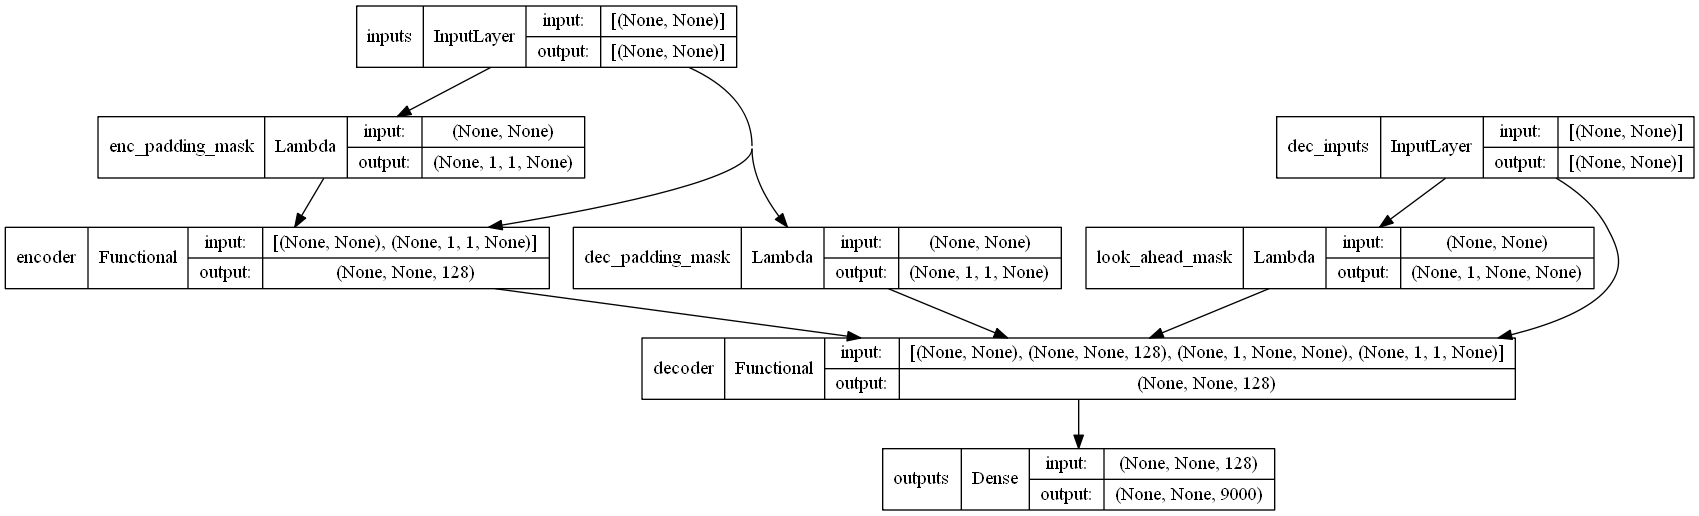

In [65]:
small_transformer = transformer(
    vocab_size = 9000,
    num_layers = 4,
    dff = 512,
    d_model = 128,
    num_heads = 4,
    dropout = 0.3,
    name="small_transformer")

tf.keras.utils.plot_model(
    small_transformer, to_file='small_transformer.png', show_shapes=True)

### 손실함수 정의

In [66]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)

### 학습률
- 트랜스포머의 경우 학습률은 고정된 값을 유지하는 것이 아니라, 학습경과에 따라 변하도록 설계하였다.

$$\Large{lrate = d_{model}^{-0.5} × min(\text{step_num}^{-0.5},\ \text{step_num} × \text{warmup_steps}^{-1.5})}$$

In [67]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)
    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

Text(0.5, 0, 'Train Step')

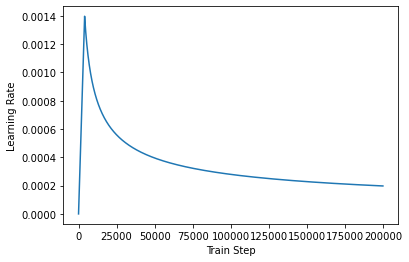

In [68]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

# 트랜스포머를 이용한 한국어 챗봇

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
import tensorflow_datasets as tfds
import tensorflow as tf

## 데이터 로드

In [24]:
train_data = pd.read_csv('C:/workspace/Data/ChatBotData.csv')
train_data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [25]:
print('챗봇 샘플의 개수: {}'.format(len(train_data)))

챗봇 샘플의 개수: 11823


In [26]:
# Missing Value 확인
train_data.isna().sum()

Q        0
A        0
label    0
dtype: int64

- 형태소 분석기를 사용하지 않고, 다른 방법인 학습 기반의 토크나이저를 사용
- 그래서 원 데이터에서 ?, ., ! 와 같은 구두점을 미리 처리해두어야 하는데, 구두점들을 단순히 제거할 수도 있지만, 여기서는 구두점 앞에 공백. 즉, 띄어쓰기를 추가하여 다른 문자들과 구분

In [27]:
questions = []

for sentence in train_data['Q']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! >> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions.append(sentence)

In [28]:
answers = []

for sentence in train_data['A']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! >> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    answers.append(sentence)

In [29]:
# 구두점들이 띄어쓰기를 통해 분리되었는지 확인

print(questions[:5])
print(answers[:5])

['12시 땡 !', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네']
['하루가 또 가네요 .', '위로해 드립니다 .', '여행은 언제나 좋죠 .', '여행은 언제나 좋죠 .', '눈살이 찌푸려지죠 .']


## 단어 집합 생성
- 서브워드텍스트인코더 사용
    - 학습데이터로부터 학습하여 서브워드로 구성된 단어집합을 생성한다

In [30]:
# 서브워드텍스트인코더를 사용하여 질문, 답변 데이터로부터 단어집합 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size = 2**13)

- 인코더-디코더 모델계열에는 디코더의 입력으로 사용할 시작을 의미하는 SOS와 종료토큰 EOS 또한 존재한다. 해당 토큰들도 단어 집합에 포함시킬 필요가 있으므로 이 두 토큰에 정수를 부여해주자

In [31]:
# 시작토큰과 종료토큰에 대한 정수부여
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 시작토큰과 종료토큰을 고려하여 단어 집합의 크기를 + 2
VOCAB_SIZE = tokenizer.vocab_size + 2

In [32]:
print('시작 토큰 번호 : ', START_TOKEN)
print('종료 토큰 번호 : ', END_TOKEN)
print('단어 집합의 크기 : ', VOCAB_SIZE)

시작 토큰 번호 :  [8178]
종료 토큰 번호 :  [8179]
단어 집합의 크기 :  8180


## 정수 인코딩과 패딩
- 단어집합을 생성한 후에는 서브워드텍스트인코더의 토크나이저로 정수인코딩을 진행할 수 있다. 
- 이는 토크나이저의 `.encode()`를 사용하여 가능하다.
- 우선 임의로 선택한 20번 질문 샘플, 즉 questions[20]을 가지고 정수인코딩을 진행해보자
- 반대로 `decode()`를 사용하여 기존의 텍스트시퀀스로 복원할 수도 있다

In [33]:
print('임의의 질문 샘플을 정수인코딩 : {}'.format(tokenizer.encode(questions[20])))

임의의 질문 샘플을 정수인코딩 : [5766, 611, 3509, 141, 685, 3747, 849]


In [34]:
# 임의의 입력 문장을 sample_string에 저장
sample_string = questions[20]

# encode() : 텍스트시퀀스 >> 정수시퀀스
tokenized_string = tokenizer.encode(sample_string)
print('정수 인코딩 후의 문장: {}'.format(tokenized_string))

# decode() : 정수시퀀스 >> 텍스트시퀀스
original_string = tokenizer.decode(tokenized_string)
print('기존 문장: {}'.format(original_string))

정수 인코딩 후의 문장: [5766, 611, 3509, 141, 685, 3747, 849]
기존 문장: 가스비 비싼데 감기 걸리겠어


- `decode()`하면 서브워드들까지 다시 붙여서 기존 단어로 복워해준다.

In [35]:
# 각 정수는 각 단어와 어떻게 mapping되는지 벙렬로 출력
# 서브워드텍스트인코더는 의미있는 단위의 서브워드로 토크나이징한다. 띄어쓰기 단위x 형태소분석단위x

for ts in tokenized_string:
    print('{} ----> {}'.format(ts, tokenizer.decode([ts])))

5766 ----> 가스
611 ----> 비 
3509 ----> 비싼
141 ----> 데 
685 ----> 감기 
3747 ----> 걸리
849 ----> 겠어


- 이번에는 전체데이터에 대해서 정수인코딩과 패딩을 진행
    - 패딩 길이는 40으로 셋팅

In [36]:
MAX_LENGTH = 40

# 토큰화 / 정수인코딩 / 시작토큰과 종료토큰 추가 / 패딩
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []
    
    for (sentence1, sentence2) in zip(inputs, outputs):
        # encode(토큰화 + 정수인코딩), 시작토큰과 종료토큰 추가
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
        
        tokenized_inputs.append(sentence1)
        tokenized_outputs.append(sentence2)
        
    # 패딩
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(tokenized_inputs, maxlen = MAX_LENGTH, padding = 'post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(tokenized_outputs, maxlen = MAX_LENGTH, padding = 'post')
    
    return tokenized_inputs, tokenized_outputs

In [37]:
questions, answers = tokenize_and_filter(questions, answers)

In [38]:
# 정수인코딩과 패딩이 진행된 후의 데이터 크기 확인

print('질문 데이터의 크기(shape) : ', questions.shape)
print('답변 데이터의 크기(shape): ', answers.shape)

질문 데이터의 크기(shape) :  (11823, 40)
답변 데이터의 크기(shape):  (11823, 40)


In [39]:
# 임의로 0번 샘플을 출력해보자

print(questions[0])
print(answers[0])

## 길이를 40으로 맞추기 위해 0으로 패딩한 결과를 확인할 수 있다

[8178 7915 4207 3060   41 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[8178 3844   74 7894    1 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


## 인코더와 디코더의 입력, 그리고 레이블 만들기

- `tf.data.Dataset`을 사용해 데이터를 배치단위로 불러올 수 있다.

In [40]:
# TF의 dataset을 이용해 셔플(shuffle)을 수행하되, 배치크기로 데이터를 묶는다.
# 또한 이 과정에서 교사강요(teaching enforcing)을 사용하기 위해 디코더의 입력과 실제값 시퀀스를 구성한다.
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더의 실제값 시퀀스에서는 시작토큰을 제거해야 한다.
dataset = tf.data.Dataset.from_tensor_slices((
{
    'inputs' : questions,
    'dec_inputs' : answers[:, :-1] # 디코더의 입력. 마지막 패딩토큰이 제거된다
},
{
    'outputs' : answers[:, 1:] # 시작토큰이 제거된다
},))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [41]:
print(answers[0]) # 기존샘플
print(answers[:1][:, :-1]) # 마지막 패딩토큰 제거하면서 길이가 39
print(answers[:1][:, 1:]) # 시작토큰 제거. 길이는 역시 39

[8178 3844   74 7894    1 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[[8178 3844   74 7894    1 8179    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]
[[3844   74 7894    1 8179    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]


## 트랜스포머 만들기

In [69]:
tf.keras.backend.clear_session()

# hyperparameter
D_MODEL = 256
NUM_LAYERS = 2
NUM_HEADS = 8
DFF = 512
DROPOUT = 0.1

model = transformer(vocab_size = VOCAB_SIZE,
                   num_layers = NUM_LAYERS,
                   dff = DFF,
                   d_model = D_MODEL,
                   num_heads = NUM_HEADS,
                   dropout = DROPOUT)

(1, 8180, 256)
(1, 8180, 256)


In [71]:
# 학습률, Optimizer 정의, model compile

learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1 = .9, beta_2 = .98, epsilon = 1e-9)

def accuracy(y_true, y_pred):
    # 레이블의 크기는 (batch_size, MAX_LENGTH - 1)
    y_true = tf.reshape(y_true, shape = (-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer = optimizer, loss = loss_function, metrics = [accuracy])

In [73]:
EPOCHS = 50

model.fit(dataset, epochs = EPOCHS)

Epoch 1/50
185/185 [==============================] - 10s 53ms/step - loss: 0.9847 - accuracy: 0.0513
Epoch 2/50
185/185 [==============================] - 10s 53ms/step - loss: 0.9161 - accuracy: 0.0551
Epoch 3/50
185/185 [==============================] - 10s 53ms/step - loss: 0.8570 - accuracy: 0.0584
Epoch 4/50
185/185 [==============================] - 10s 52ms/step - loss: 0.7949 - accuracy: 0.0633
Epoch 5/50
185/185 [==============================] - 10s 53ms/step - loss: 0.7267 - accuracy: 0.0698
Epoch 6/50
185/185 [==============================] - 10s 53ms/step - loss: 0.6522 - accuracy: 0.0779
Epoch 7/50
185/185 [==============================] - 10s 53ms/step - loss: 0.5725 - accuracy: 0.0865
Epoch 8/50
185/185 [==============================] - 10s 52ms/step - loss: 0.4896 - accuracy: 0.0964
Epoch 9/50
185/185 [==============================] - 10s 52ms/step - loss: 0.4074 - accuracy: 0.1065
Epoch 10/50
185/185 [==============================] - 10s 52ms/step - loss: 0.327

## 챗봇 평가하기
- 3개의 함수 구현
    - predict > evaluate > preprocess_sentence 
        1. 입력값 들어오면 `preprocess_sentence`함수에서 문자열에 대한 전처리 수행 (해당 전처리는 학습 전 질문데이터와 답변데이터에서 했던 전처리와 동일함)
        2. 전처리가 진행된 문자열에 대해 `evaluate`는 트랜스포머 모델에 전처리가 진행된 입력값을 전달
        3. 디코더를 통해 계속해서 현재 시점의 예측, 즉, 챗봇의 대답에 해당하는 단어를 순차적으로 예측한다 (여기서 예측된 단어들은 문자열이 아니라 정수인 상태이므로, evaluate함수가 리턴하는 것은 결과적으로 상수시퀀스다)
        4. `predict`함수는 `evaluate`함수로부터 전달받은 챗봇의 대답에 해당하는 정수시퀀스를 문자열로 다시 디코딩
        5. 사용자에게 챗봇의 대답 출력

In [74]:
def preprocess_sentence(sentence):
    # 단어와 구두점 사이에 공백 추가.
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    return sentence

In [75]:
def evaluate(sentence):
    # 입력문장 전처리
    sentence = preprocess_sentence(sentence)
    
    # 입력문장에 시작토큰과 종료토큰 추가
    sentence = tf.expand_dims(START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis = 0)
    
    output = tf.expand_dims(START_TOKEN, 0)
    
    # 디코더의 예측시작
    for i in range(MAX_LENGTH):
        predictions = model(inputs = [sentence, output], training = False)
        
        # 현재시점의 예측단어를 받아오기
        predictions = predictions[:, -1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis = -1), tf.int32)
        
        # 만약 현재시점의 예측단어가 종료토큰이라면 예측을 중단
        if tf.equal(predicted_id, END_TOKEN[0]):
            break
            
        # 현재시점의 예측단어를 output에 연결
        # output은 for문의 다음루프에서 디코더의 입력이 될것.
        output = tf.concat([output, predicted_id], axis = -1)
        
    # 단어의 예측이 모두 끝났다면, output을 리턴
    return tf.squeeze(output, axis = 0)

In [76]:
def predict(sentence):
    prediction = evaluate(sentence)
    
    # prediction == 디코더가 리턴한 챗봇의 대답에 해당하는 정수시퀀스
    # tokenizer.decode()를 통해 정수 시퀀스를 문자열로 디코딩.
    predicted_sentence = tokenizer.decode([i for i in prediction if i < tokenizer.vocab_size])
    
    print('Input : {}'.format(sentence))
    print('Output : {}'.format(predicted_sentence))
    
    return predicted_sentence

In [77]:
output = predict("영화 볼래?")

Input : 영화 볼래?
Output : 최신 영화가 좋을 것 같아요 .


In [78]:
output = predict('오늘 날씨가 너무 추워')

Input : 오늘 날씨가 너무 추워
Output : 집밖에 나가기가 힘들것 같아요 .


In [80]:
output = predict('게임하고싶다')

Input : 게임하고싶다
Output : 저도요 !


In [81]:
output = predict('나랑 게임하자!')

Input : 나랑 게임하자!
Output : 게임하세요 !


In [82]:
output = predict('밥 먹었어?')

Input : 밥 먹었어?
Output : 저는 배터리가 밥이예요 .


In [84]:
output = predict('오늘 하루 어땠어?')

Input : 오늘 하루 어땠어?
Output : 오늘도 이렇게 이겨냈어요 .


In [85]:
output = predict('하루종일 누워있고싶다')

Input : 하루종일 누워있고싶다
Output : 쉬운 일이 아니죠 .


In [89]:
output = predict('너 되게 똑똑하다!')

Input : 너 되게 똑똑하다!
Output : 지금도 충분해요 .


In [91]:
output = predict('1 더하기 1은 뭘까?')

Input : 1 더하기 1은 뭘까?
Output : 1은 알게 해야죠 .


# Multi-head Self Attention for Text Classification
- 트랜스포머의 인코더는 셀프어텐션이라는 메커니즘을 통해 문장을 이해한다.
- RNN과 그 동작 방식은 다르지만, RNN이 텍스트분류나 개체명인식과 같은 다양한 자연어처리 태스크에 쓰일 수 있다면 트랜스포머의 인코더 또한 가능할 것이다.
- 실제로 트랜스포머의 인코더는 다양한 분야의 자연어처리 태스크에서 사용될 수 있었고, 이 아이디어는 후에 BERT라는 모델로 이어지게된다.

## 멀티헤드어텐션

In [1]:
import tensorflow as tf

In [2]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads = 8):
        super(MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim   # d_model
        self.num_heads = num_heads
        
        assert embedding_dim % self.num_heads == 0
        
        self.projection_dim = embedding_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embedding_dim)
        self.key_dense = tf.keras.layers.Dense(embedding_dim)
        self.value_dense = tf.keras.layers.Dense(embedding_dim)
        self.dense = tf.keras.layers.Dense(embedding_dim)
        
    def scaled_dot_product_attention(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b = True)
        depth = tf.cast(tf.shape(key)[-1], tf.float32)
        logits = matmul_qk / tf.math.sqrt(depth)
        attention_weights = tf.nn.softmax(logits, axis = -1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights
    
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm = [0, 2, 1, 3])
    
    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)
        
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)
        
        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)
        
        scaled_attention = tf.transpose(scaled_attention, perm = [0, 2, 1, 3])
        
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))
        outputs = self.dense(concat_attention)
        return outputs

## 인코더 설계하기
- 멀티헤드어텐션에 두번째 서브층인 position-wise feed forward neural network를 추가해 인코더 클래스를 설계한다.

In [3]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(embedding_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dense(embedding_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs) # 첫번째 서브층 : 멀티 헤드 어텐션
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) # Add & Norm
        ffn_output = self.ffn(out1) # 두번째 서브층 : 포지션 와이즈 피드 포워드 신경망
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output) # Add & Norm

## 포지션 임베딩
- 위치정보 자체를 학습을 하도록하는포지션임베딩이라는 방법을 사용하자.
- 이는 BERT에서 사용하는 방법이기도하다.
- 포지션 임베딩은 임베딩 층을 사용하되, 위치벡터를 학습하도록하므로 임베딩 층의 첫번째 인자로 단어 집합의 크기가 아니라 문장의 최대 길이를 넣어준다.

In [4]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, max_len, vocab_size, embedding_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.pos_emb = tf.keras.layers.Embedding(max_len, embedding_dim)
        
    def call(self, x):
        max_len = tf.shape(x)[-1]
        positions = tf.range(start = 0, limit = max_len, delta = 1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

## 데이터 로드 및 전처리

In [5]:
vocab_size = 20000
max_len = 200

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words = vocab_size)
print(len(x_train))
print(len(x_test))

25000
25000


In [6]:
# 전처리
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen = max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen = max_len)

## 트랜스포머를 이용한 IMDB 리뷰 분류

In [7]:
embedding_dim = 32  ## 각 단어의 임베딩 벡터의 차원
num_heads = 2  ## 어텐션 헤드의 수
dff = 32  ## 포지션 와이즈 피드 포워드 신경망의 은닉층의 크기

inputs = tf.keras.layers.Input(shape = (max_len, ))
embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embedding_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embedding_dim, num_heads, dff)

x = transformer_block(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(20, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(2, activation = 'softmax')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.compile("adam", "sparse_categorical_crossentropy", metrics = ['acc'])
hist = model.fit(x_train, y_train, batch_size = 32, epochs = 2, validation_data = (x_test, y_test))

Epoch 1/2
782/782 [==============================] - 13s 14ms/step - loss: 0.3722 - acc: 0.8298 - val_loss: 0.2892 - val_acc: 0.8762
Epoch 2/2
782/782 [==============================] - 11s 14ms/step - loss: 0.1999 - acc: 0.9246 - val_loss: 0.3524 - val_acc: 0.8491


In [10]:
print('테스트 정확도 : {}'.format(model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 4s 4ms/step - loss: 0.3524 - acc: 0.8491
테스트 정확도 : 0.8490800261497498
